In [1]:
import os 

import pandas as pd
import s3fs
import mlflow
from utils import preprocessing

In [2]:
df = pd.read_csv("dataset/weather_data_recent_test.csv")

In [3]:
HOST = "http://mlflow.mlflow:5000"

os.environ['AWS_ACCESS_KEY_ID'] = 'admin'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'admin123'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = "http://minio.minio"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'admin1234567'

mlflow.set_tracking_uri(HOST)

registered_model_name = "seoulbike-rental-prediction-rf"
version = 1

loaded_model = mlflow.sklearn.load_model(f"models:/{registered_model_name}/{version}")

In [4]:
X, y = df.drop('rental_cnt', axis=1), df["rental_cnt"]

In [5]:
X = X[loaded_model.feature_names_in_.tolist()]
y_predict = loaded_model.predict(X)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')

MSE: 17586415.0922
RMSE: 4193.6160
MAE: 3188.9887
R2 Score: -0.9236


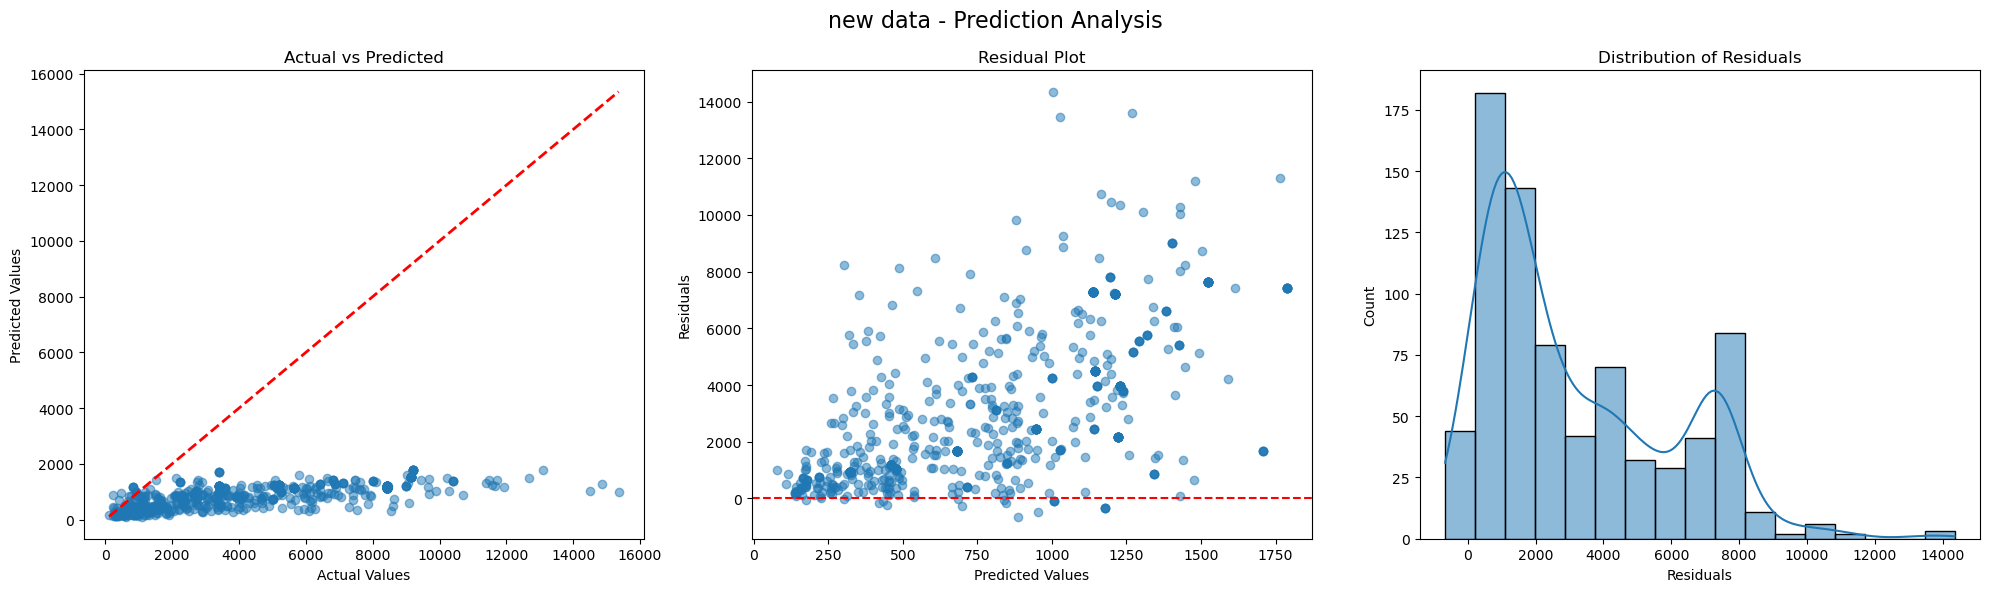

In [7]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. 산점도
ax1.scatter(y, y_predict, alpha=0.5)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Actual vs Predicted')

# 3. 잔차 플롯
residuals = y - y_predict
ax2.scatter(y_predict, residuals, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')

sns.histplot(residuals, ax=ax3, kde=True)
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Residuals')


plt.suptitle(f'new data - Prediction Analysis', fontsize=16)
plt.tight_layout()

# Jupyter Notebook에 표시
plt.show()

# 메모리 정리
plt.close()
